In [13]:
import sys, os
import numpy as np
sys.path.append(os.path.abspath('../../smodels'))
from smodels.tools.simplifiedLikelihoods import UpperLimitComputer, Data, LikelihoodComputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats,integrate,optimize,special
from tqdm.notebook import tqdm

In [14]:
def getSRs():
    from smodels.experiment.databaseObj import Database
    db = Database ( "official" )
    ers = db.getExpResults( dataTypes=[ "efficiencyMap" ] )
    stats_ = []
    for er in ers:
        for ds in er.datasets:
            D = { "obsN": ds.dataInfo.observedN, "expectedBG": ds.dataInfo.expectedBG,
                  "bgError": ds.dataInfo.bgError, "upperLimit": ds.dataInfo.upperLimit,
                  "expectedUpperLimit": ds.dataInfo.expectedUpperLimit }
            stats_.append ( D )
    return stats_

In [6]:
stats_ = getSRs()

In [19]:
def llhd_smodels (mu, nobs, nExp, nExpErr):
    data = Data ( nobs, nExp, nExpErr**2, nsignal = 1)
    llhd_computer = LikelihoodComputer(data)
    return llhd_computer.marginalizedLLHD1D(mu, nll=False)

In [39]:
norm = []
for i in tqdm(stats_):
    nobs = i["obsN"]
    nExp = i["expectedBG"]
    nExpErr = i["bgError"]
    mumax = (nobs+nExp+nExpErr)*10
    try:
        norm_ = integrate.quad(llhd_smodels, 0, mumax, args=(nobs, nExp, nExpErr))
    except:
        continue
    norm.append(norm_[0])

  0%|          | 0/271 [00:00<?, ?it/s]

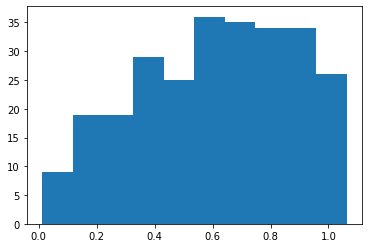

In [42]:
plt.hist(norm, bins=10)
plt.show()